# Градиентный спуск.

## Курс "Машинное обучение", программа AI Masters

## Краснов Александр, Илья Карчмит

## Градиентный спуск

$$w^{(t+1)} = w^{(t)} - \eta \nabla L(w^{(t)})$$
где $\eta > 0$ — длина шага (learning rate) градиентного спуска.

## Линейная регрессия

Есть задача 

$$ \lVert Xw - y \rVert^2 \rightarrow min_w$$


<font color='red'> Как выглядит решение?</font>
$$w = ??$$

<font color='red'> Как выглядит градиент?</font>
$$\nabla L(w) = ??$$

## Код

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

n_features = 2
X, y = make_regression(
    1000,
    n_features=n_features,
    n_informative=2,
    random_state=0,
)
X.shape, y.shape

((1000, 2), (1000,))

In [2]:
np.random.seed(2)
w_0 = np.random.uniform(-100, 100, (n_features))
w_true = np.linalg.inv(X.T @ X) @ X.T @ y

In [3]:
w_true, w_0

(array([41.09157343, 40.05104636]), array([-12.80101957, -94.81475363]))

In [4]:
def loss(X, y, w):
    return np.sum((X @ w - y) ** 2)

In [5]:
assert np.isclose(np.sum((X @ w_true - y) ** 2), 0)

In [6]:
def plot_w_history(w_history):
    plt.figure(figsize=(14,8))
    plt.scatter(np.repeat(w_true[0], 2), np.repeat(w_true[1], 2),s=[50,10], color=['k','w'])
    plt.scatter(w_history[:, 0], w_history[:, 1], color = 'b', s=10, alpha=0.6)
    for i in range(1, w_history.shape[0]):
        plt.annotate('', xy=w_history[i], xytext=w_history[i-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')

    theta0_grid = np.linspace(-100, 100, 101)
    theta1_grid = np.linspace(-100, 100, 101)

    theta0 = theta0_grid[np.newaxis, :, np.newaxis]
    theta1 = theta1_grid[:, np.newaxis, np.newaxis]
    L_grid = np.average((y - X[:, 0] * theta0 - X[:, 1] * theta1) ** 2, axis=2) / 2
    X_grid, Y_grid = np.meshgrid(theta0_grid, theta1_grid)
    contours = plt.contour(X_grid, Y_grid, L_grid, 100)
    plt.clabel(contours)
    plt.xlim((-100, 100))
    plt.ylim((-100, 100))
    plt.show()

Реализуем простой градиентный спуск

## GD

In [7]:
def gd(X, y, w_0, eta=1e-1, n_iter=300):
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        pass
    return np.array(w_history)

In [8]:
w_history = gd(X, y, w_0)

In [9]:
assert np.isclose(w_history[-1], w_true, atol=1e-1).all()

AssertionError: 

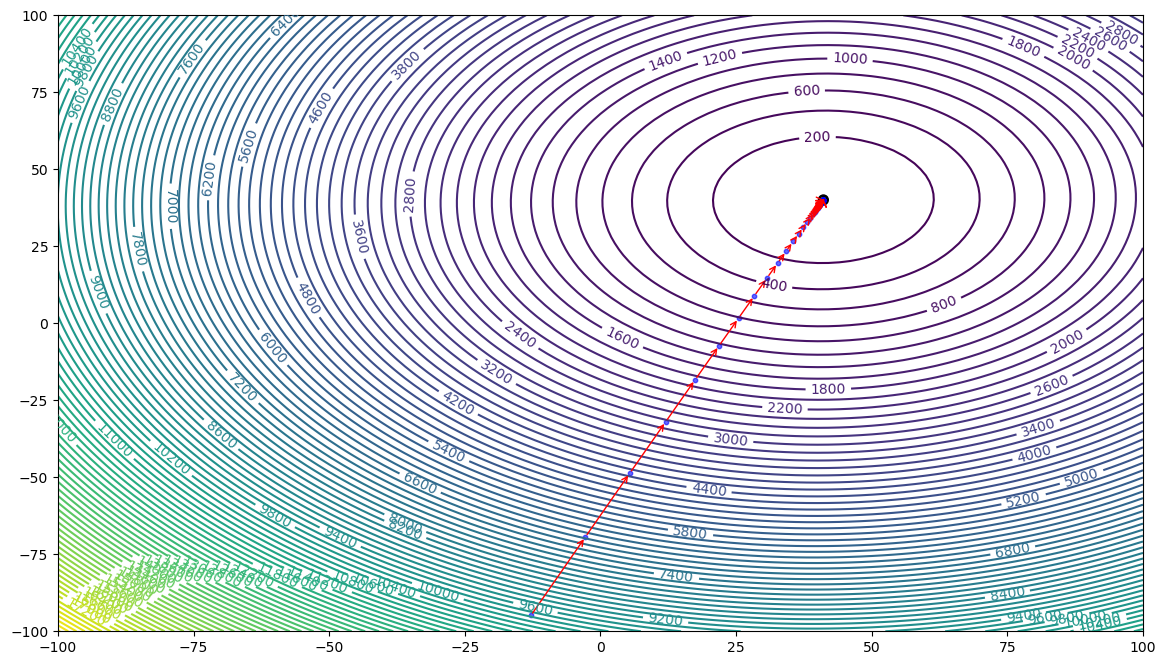

In [11]:
plot_w_history(w_history)

## SGD
Попробуем реализовать stochastic gradient descent...

In [23]:
def sgd(X, y, w_0, eta=1e-1, n_iter=300, batch_size=100):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        pass
    return np.array(w_history)

In [35]:
w_history_sgd = sgd(X, y, w_0, eta=0.1)

In [36]:
assert np.isclose(w_history_sgd[-1], w_true, atol=1e-1).all()

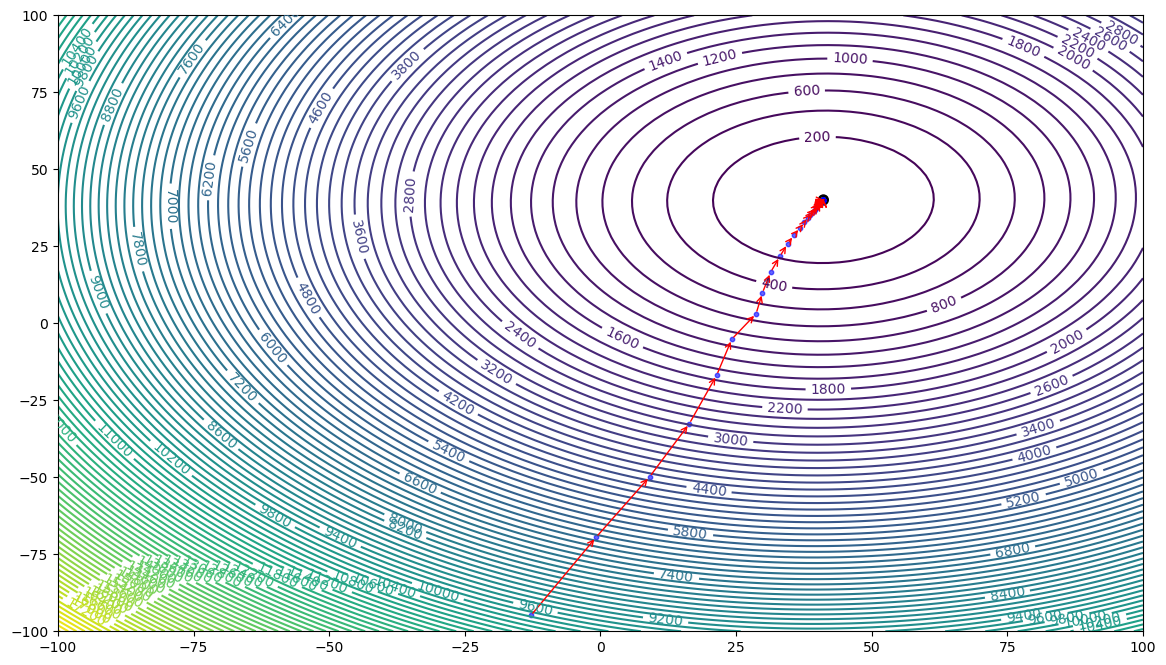

In [37]:
plot_w_history(w_history_sgd)

Добавим последовательное уменьшение шага градиента

Возьмем $\eta_t = \frac{1}{1+t}$

In [38]:
def lr_shedule(t):
    pass

def sgd_lr_schedule_v1(X, y, w_0, eta=1e-1, n_iter=300, batch_size=100):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=False)
        X_sample = X[mask]
        y_sample = y[mask]
        w -= ???
        w_history.append(w.copy())
    return np.array(w_history)

In [39]:
w_history_sqd_lr_schedule_v1 = sgd_lr_schedule_v1(X, y, w_0)

In [40]:
assert np.isclose(w_history_sqd_lr_schedule_v1[-1], w_true, atol=1e-1).all()

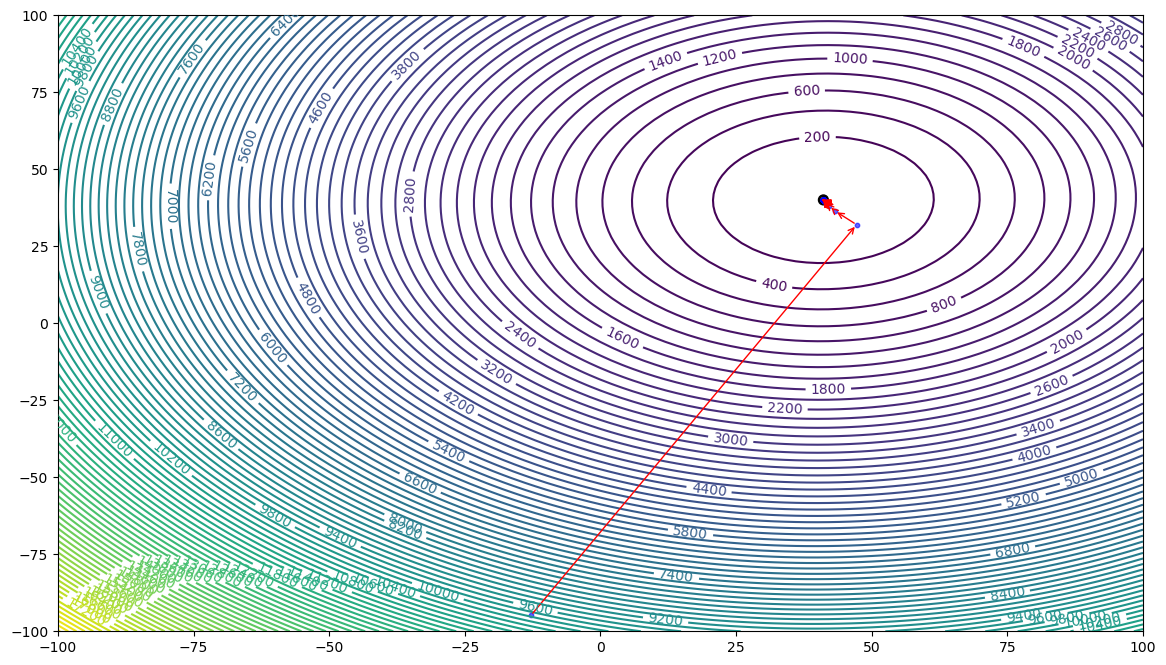

In [41]:
plot_w_history(w_history_sqd_lr_schedule_v1)

$\eta_t = \frac{\alpha}{t^{\beta}}$

In [42]:
def lr_shedule_v2(t, alpha, beta):
    pass

def sgd_lr_schedule_v2(X, y, w_0, eta=1e-1, n_iter=300, batch_size=100, beta=0.5):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=False)
        X_sample = X[mask]
        y_sample = y[mask]
        w -= pass
        w_history.append(w.copy())
    return np.array(w_history)

In [43]:
w_history_sqd_lr_schedule_v2 = sgd_lr_schedule_v2(X, y, w_0)

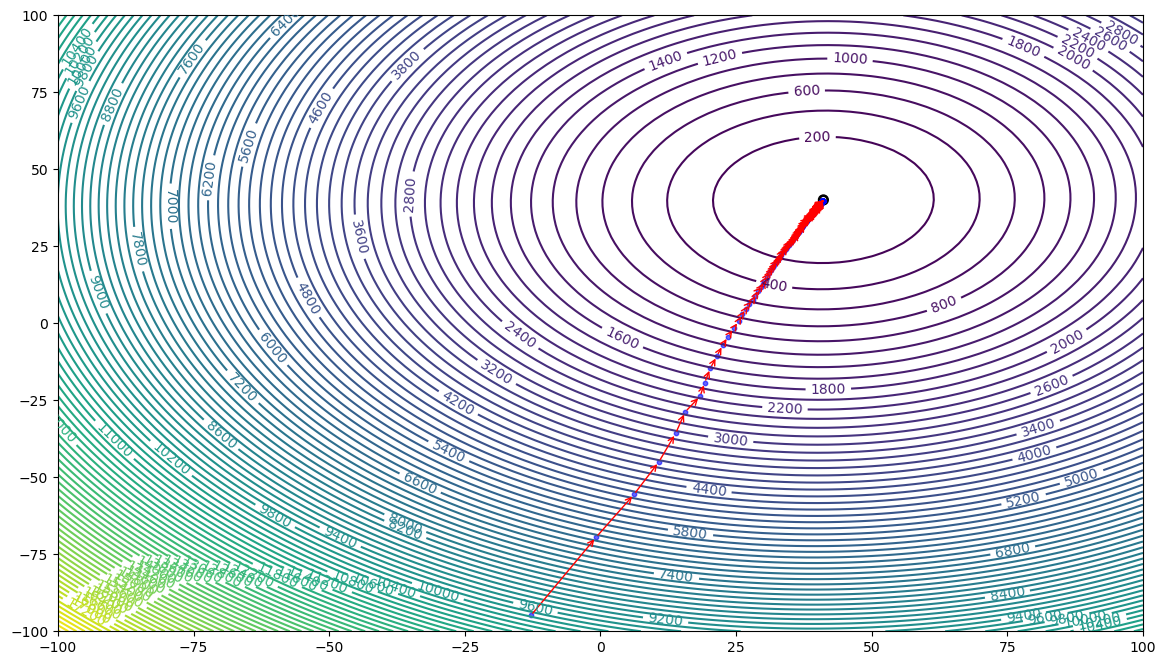

In [44]:
plot_w_history(w_history_sqd_lr_schedule_v2)

In [45]:
assert np.isclose(w_history_sqd_lr_schedule_v2[-1], w_true, atol=1e-1).all()

AssertionError: 

## Критерий останова

In [46]:
def sgd_lr_schedule_v2(X, y, w_0, eta=1e-1, n_iter=10000, batch_size=100, beta=0.5, eps=1e-2):
    np.random.seed(0)
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=False)
        X_sample = X[mask]
        y_sample = y[mask]
        w -= 2 * lr_shedule_v2(i, eta, beta) * X_sample.T @ (X_sample @ w - y_sample) / y_sample.shape[0]
        ???
        w_history.append(w.copy())
    return np.array(w_history)

In [47]:
w_history_sqd_lr_schedule_v2 = sgd_lr_schedule_v2(X, y, w_0)

Early stop on 190 step


In [48]:
assert np.isclose(w_history_sqd_lr_schedule_v2[-1], w_true, atol=1e-1).all()

AssertionError: 

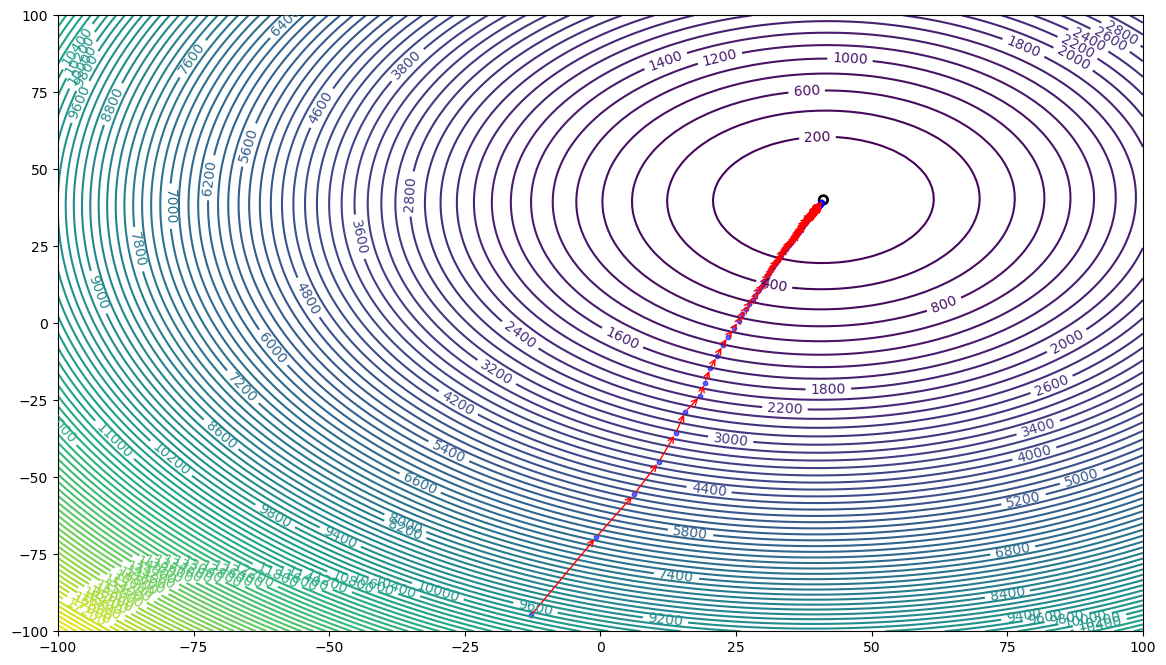

In [49]:
plot_w_history(w_history_sqd_lr_schedule_v2)

Что можно поиследовать?
* Сравнить скорости сходимости для фиксированного набора данных (gd/sgd, разный набор параметров в lr_shedule)
* Как использование batch в sgd ускоряет сходимость?

## L1- и L2-регуляризация
$$ L(w) = \sum (Xw - y)^2 + \lambda \lVert w \rVert_1$$
$$\nabla L(w) = ??$$

In [50]:
l1 = 10

In [51]:
def l1_loss(X, y, w, l1):
    pass

Как проверить градиент?

In [52]:
def get_numeric_grad(f, x, eps):
    pass

In [53]:
get_numeric_grad(lambda w: l1_loss(X, y, w, l1), w_0, 1e-8)

array([-100369.37892437, -254815.07182121])

In [54]:
def grad_l1(X, y, w, l1):
   pass

In [55]:
grad_l1(X, y, w_0, l1)

array([-100369.45905008, -254815.20186081])

$$ L(w) = \sum (Xw - y)^2 + \lambda \lVert w \rVert^2_2$$
$$\nabla L(w) = ??$$

In [56]:
l2 = 10
def l2_loss(X, y, w, l2):
    pass

In [57]:
get_numeric_grad(lambda w: l2_loss(X, y, w, l1), w_0, 1e-8)

array([-100615.24808407, -256701.18629932])

In [58]:
def grad_l2(X, y, w, l2):
    pass

In [59]:
grad_l2(X, y, w_0, l2)

array([-100615.47944151, -256701.4969335 ])

In [60]:
def sgd_lr_schedule_v2_l2_reg(X, y, w_0, eta=1e-1, n_iter=10000, batch_size=100, beta=0.5, eps=1e-2, alpha=1):
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=False)
        X_sample = X[mask]
        y_sample = y[mask]
        w -= ???
        if (np.abs(w - w_history[-1]) < eps).all():
            print(f'Early stop on {i} step')
            break
        w_history.append(w.copy())
    return np.array(w_history)

In [61]:
w_history_sgd_lr_schedule_v2_l2_reg = sgd_lr_schedule_v2_l2_reg(X, y, w_0, alpha=0.01)

Early stop on 7 step


In [62]:
assert np.isclose(w_history_sgd_lr_schedule_v2_l2_reg[-1], w_true, atol=1e-1).all()

In [63]:
def sgd_lr_schedule_v2_l1_reg(X, y, w_0, eta=1e-1, n_iter=10000, batch_size=100, beta=0.5, eps=1e-2, alpha=1):
    w = w_0.copy()
    w_history = [w.copy()]
    for i in range(1, n_iter):
        mask = np.random.choice(np.arange(X.shape[0]), size=batch_size, replace=False)
        X_sample = X[mask]
        y_sample = y[mask]
        w -= ???
        if (np.abs(w - w_history[-1]) < eps).all():
            print(f'Early stop on {i} step')
            break
        w_history.append(w.copy())
    return np.array(w_history)

In [64]:
w_history_sgd_lr_schedule_v2_l1_reg = sgd_lr_schedule_v2_l1_reg(X, y, w_0, alpha=0.1,)

Early stop on 7 step


In [65]:
assert np.isclose(w_history_sgd_lr_schedule_v2_l1_reg[-1], w_true, atol=1e-1).all()

In [66]:
X_new = np.hstack([X, (0.59 * X[:, 0] + 1.35 * X[:, 1]).reshape(-1, 1)])

In [67]:
np.random.seed(2)
n_features = 3
w_0_new = np.random.uniform(-100, 100, (n_features))
# w_true_new = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y
w_0_new

array([-12.80101957, -94.81475363,   9.93249558])

In [68]:
w_history_sgd_lr_schedule_v2_l1_reg = sgd_lr_schedule_v2_l1_reg(X_new, y, w_0_new, eps=1e-4)

Early stop on 157 step


In [69]:
w_history_sgd_lr_schedule_v2_l1_reg[-1]

array([ -0.54429319, -55.21812487,  70.56966067])

In [70]:
def plot_weights(w_history):
    plt.figure(figsize=(14,8))
    color = plt.cm.rainbow(np.linspace(0, 1, w_history.shape[1]))
    for i in range(w_history.shape[1]):
        plt.plot(
            np.arange(w_history[:, i].shape[0]),
            np.abs(w_history[:, i]),
            c=color[i], label=f'weight {i}')
    plt.yscale('log')
    plt.xlabel('Num iter')
    plt.ylabel('Abs weight')
    plt.legend()
    plt.show()

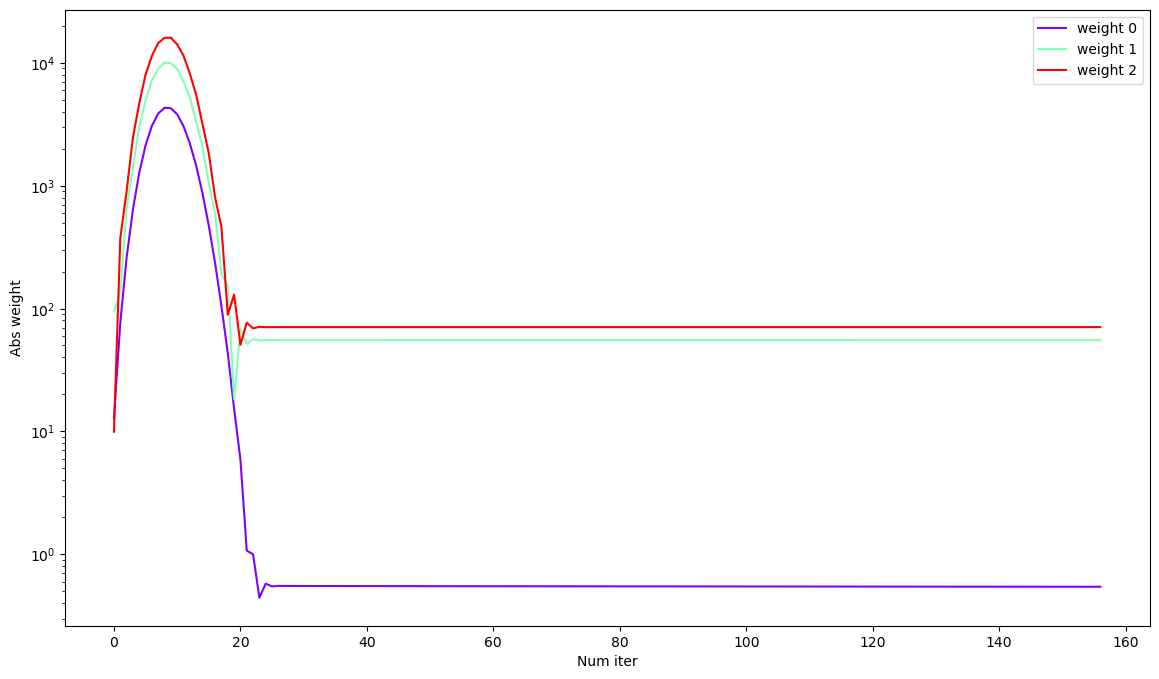

In [71]:
plot_weights(w_history_sgd_lr_schedule_v2_l1_reg)

In [72]:
np.sum((X_new @ w_history_sgd_lr_schedule_v2_l1_reg[-1] - y) ** 2)

6.908795901272444e-05

In [73]:
w_history_sgd_lr_schedule_v2_l2_reg = sgd_lr_schedule_v2_l2_reg(X_new, y, w_0_new, eps=1e-4)

In [74]:
w_history_sgd_lr_schedule_v2_l2_reg[-1]

array([  8.29588234, -34.93425792,  55.53915521])

In [75]:
np.sum((X_new @ w_history_sgd_lr_schedule_v2_l2_reg[-1] - y) ** 2)

0.7809688666343513

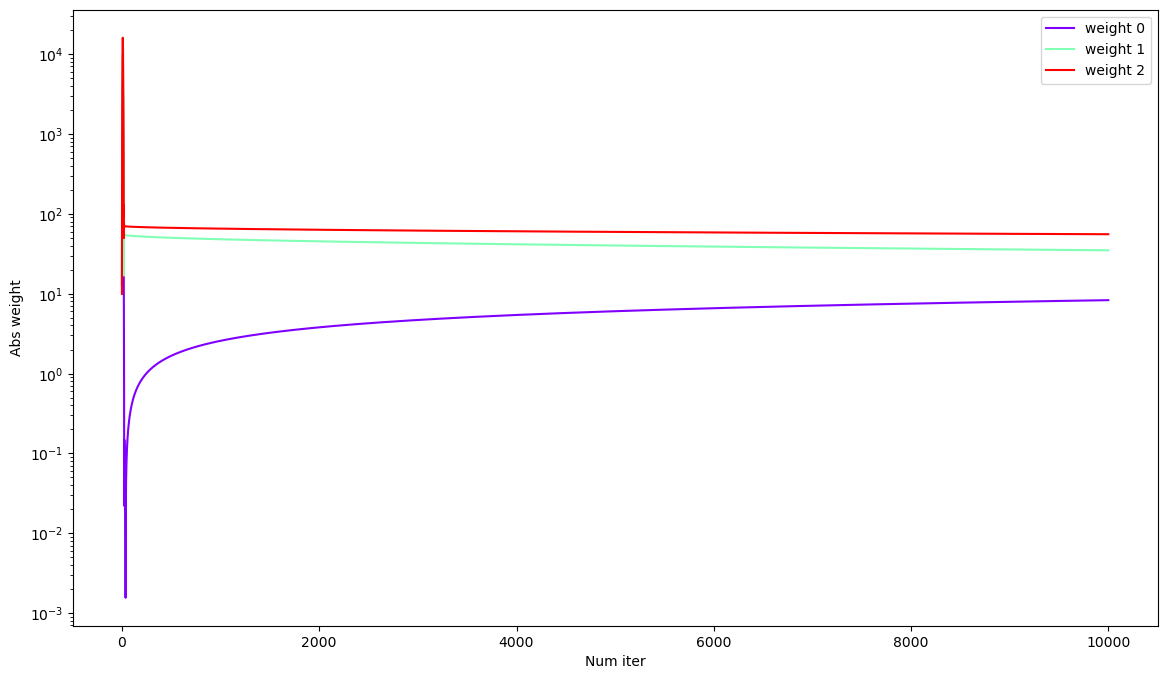

In [76]:
plot_weights(w_history_sgd_lr_schedule_v2_l2_reg)

Можем все сложить в класс
* gd/sgd
* l1/l2/None
* критерии останова
* eta schedule

In [77]:
class Gradient_descent_mse:
    def __init__(stochastic_batch=None, n_iter=1000, reg=None):
        pass
    
    def descent(self, return_w_history=True, return_loss_history=False):
        pass
    
    def loss(self, X, y, w):
        pass
    
    def gradient_loss(self, X, y, w):
        pass
        
    def eta_schedule(self, k):
        pass
    
    

Добавить рисовалку градиента (для рассуждений)

## Бинарная классификация
$$L(w) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$
$$\nabla L = \sigma(-y\langle w,x\rangle ) * -yx$$

Продолжение следует в дз?...